#### Text Classification using different Techniques
1. Bag of Words + GaussianNB
2. Bag of Words + RandomForest
3. N-Grams + RandomForest
4. TF-IDF + RandomForest
5. TF-IDF + Logistic Regression
6. Word2Vec + RandomForest
7. Word2Vec + Deep Neural Network

In [3]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import gensim
from nltk import sent_tokenize, word_tokenize
from tensorflow import keras

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df = df[:10000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Null and duplicate check
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
df.shape

review       0
sentiment    0
dtype: int64


(9983, 2)

Basic Preprocessing

In [6]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_stop_words(text):
    stopwords_list = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)

def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

df_reviews = df.review.apply(remove_html_tags).apply(remove_stop_words).apply(remove_punctuations).apply(lambda x: x.lower())
df_reviews.head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [7]:
encoder = LabelEncoder()
df_sentiments = encoder.fit_transform(df.sentiment)
df_sentiments[:5]

array([1, 1, 1, 0, 1])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_reviews, df_sentiments, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7986,), (1997,), (7986,), (1997,))

In [9]:
def confusion_matrix_report(y_true, y_pred):
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
def train_and_predict(model, x_train, y_train, x_test, y_test):
    print(f"Training {model.__class__.__name__}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    confusion_matrix_report(y_test, y_pred)
    return accuracy

In [10]:
gnb = GaussianNB()
rc = RandomForestClassifier()
lr = LogisticRegression(max_iter=200)

Bag of Words + GaussianNB


In [11]:
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)
x_train_cv.shape, x_test_cv.shape

((7986, 72377), (1997, 72377))

Training GaussianNB...
Accuracy: 0.6269
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       985
           1       0.65      0.57      0.61      1012

    accuracy                           0.63      1997
   macro avg       0.63      0.63      0.63      1997
weighted avg       0.63      0.63      0.63      1997



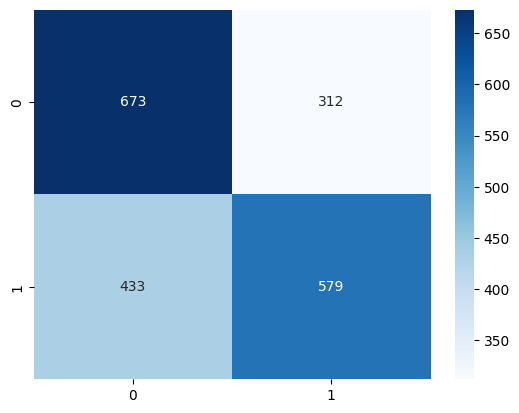

In [12]:
gnb_bow_a = train_and_predict(gnb, x_train_cv.toarray(), y_train, x_test_cv.toarray(), y_test)

Bag of Words + RandomForest

Training RandomForestClassifier...
Accuracy: 0.8518
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       985
           1       0.85      0.86      0.85      1012

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997



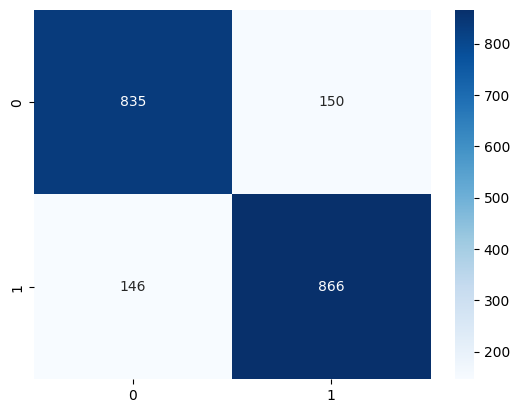

In [13]:
rc_bow_a = train_and_predict(rc, x_train_cv, y_train, x_test_cv, y_test)

N-Grams + RandomForest

In [14]:
ng_cv = CountVectorizer(ngram_range=(2,3), max_features=5000)
x_train_ng = ng_cv.fit_transform(x_train)
x_test_ng = ng_cv.transform(x_test)
x_train_ng.shape, x_test_ng.shape

((7986, 5000), (1997, 5000))

Training RandomForestClassifier...
Accuracy: 0.7291
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       985
           1       0.78      0.65      0.71      1012

    accuracy                           0.73      1997
   macro avg       0.74      0.73      0.73      1997
weighted avg       0.74      0.73      0.73      1997



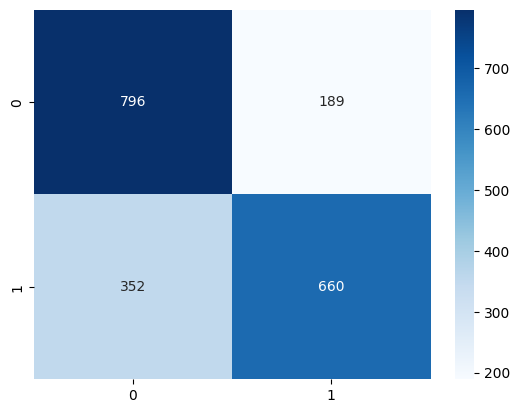

In [15]:
rc_ng_a = train_and_predict(rc, x_train_ng, y_train, x_test_ng, y_test)

TF-IDF + RandomForest

In [16]:
tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
x_train_tfidf.shape, x_test_tfidf.shape

((7986, 5000), (1997, 5000))

Training RandomForestClassifier...
Accuracy: 0.8373
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       985
           1       0.85      0.82      0.84      1012

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997



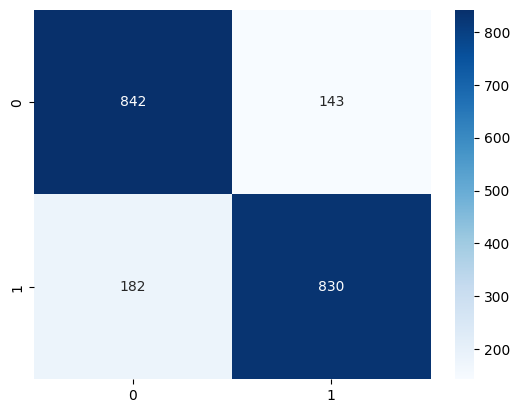

In [17]:
rc_tfidf_a = train_and_predict(rc, x_train_tfidf, y_train, x_test_tfidf, y_test)

TF-IDF + Logistic Regression

Training LogisticRegression...
Accuracy: 0.8743
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       985
           1       0.87      0.88      0.88      1012

    accuracy                           0.87      1997
   macro avg       0.87      0.87      0.87      1997
weighted avg       0.87      0.87      0.87      1997



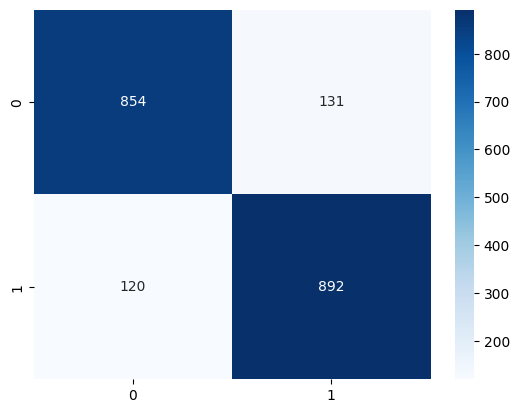

In [18]:
lr_tfidf_a = train_and_predict(lr, x_train_tfidf, y_train, x_test_tfidf, y_test)

Word2Vec + RandomForest

In [19]:
sentences = []
for review in df_reviews:
    for sent in sent_tokenize(review):
        sentences.append(gensim.utils.simple_preprocess(sent))
        
print(sentences[0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'me', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences',

In [20]:
word2vec_model = gensim.models.Word2Vec(window=5, min_count=2, workers=4)
word2vec_model.build_vocab(sentences, progress_per=1)
len(word2vec_model.wv.key_to_index.keys())

35241

In [21]:
word2vec_model.train(sentences, total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)

(5556284, 5983650)

In [22]:
# sentence vector
def document_vector(doc):
    doc = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0)

document_vector(df_reviews.values[0]) # document vector for first sentence

array([-0.26149848,  0.43495056,  0.1794899 ,  0.14133464,  0.13636732,
       -0.6162582 ,  0.26451162,  0.64334273, -0.11771408, -0.34522834,
       -0.18558905, -0.495268  , -0.10715282,  0.14646375,  0.18741243,
       -0.31375015,  0.17318413, -0.33652425, -0.1571551 , -0.7106163 ,
        0.3479217 ,  0.31863567,  0.395635  , -0.23878253,  0.07612409,
       -0.04567239, -0.39761257, -0.19577268, -0.31384414,  0.12123059,
        0.4353822 , -0.0448467 ,  0.10952934, -0.33271623, -0.16827767,
        0.44411534, -0.0467426 , -0.11394888, -0.22002524, -0.6623548 ,
        0.05222285, -0.33817726, -0.01851068, -0.05292428,  0.22645918,
       -0.16459675, -0.33165142, -0.01512026,  0.07574175,  0.09920795,
        0.18179469, -0.38659072, -0.21328549, -0.1978897 , -0.28246734,
        0.18146992,  0.2609593 , -0.0581585 , -0.24916767,  0.3067891 ,
        0.07026231,  0.0738473 ,  0.07775383,  0.02583243, -0.5099724 ,
        0.50144273, -0.0111525 ,  0.41682935, -0.5122881 ,  0.50

In [23]:
w2v_x = []
for doc in df_reviews.values:
    w2v_x.append(document_vector(doc))
    
w2v_x = np.array(w2v_x)
w2v_x.shape

(9983, 100)

In [24]:
x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = train_test_split(w2v_x, df_sentiments, test_size=0.2, random_state=42)
x_train_w2v.shape, x_test_w2v.shape, y_train_w2v.shape, y_test_w2v.shape

((7986, 100), (1997, 100), (7986,), (1997,))

Training RandomForestClassifier...
Accuracy: 0.7651
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       985
           1       0.77      0.77      0.77      1012

    accuracy                           0.77      1997
   macro avg       0.77      0.77      0.77      1997
weighted avg       0.77      0.77      0.77      1997



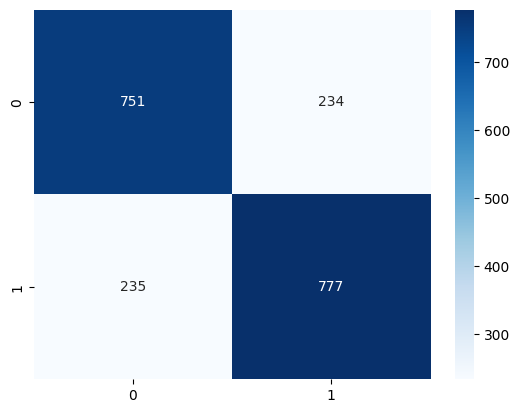

In [25]:
# Test Word2Vec with RandomForest first
rc_w2v_a = train_and_predict(rc, x_train_w2v, y_train_w2v, x_test_w2v, y_test_w2v)

Word2Vec + Deep Neural Network

In [26]:
# Create DNN model using Keras (not gensim)
dnn_model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(100,)),  
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,249 (83.00 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
dnn_model.fit(x_train_w2v, y_train_w2v, epochs=100, batch_size=32, validation_data=(x_test_w2v, y_test_w2v))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6816 - loss: 0.5811 - val_accuracy: 0.7576 - val_loss: 0.5025
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5030 - val_accuracy: 0.7772 - val_loss: 0.4731
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7651 - loss: 0.4865 - val_accuracy: 0.7872 - val_loss: 0.4622
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7680 - loss: 0.4842 - val_accuracy: 0.7822 - val_loss: 0.4598
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7760 - loss: 0.4779 - val_accuracy: 0.7752 - val_loss: 0.4825
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7805 - loss: 0.4733 - val_accuracy: 0.7857 - val_loss: 0.4597
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7739 - loss: 0.4741 - val_accuracy: 0.7932 - val_loss: 0.4584
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7829 - loss: 0.4632 - val_accu

In [28]:
dnn_model.evaluate(x_test_w2v, y_test_w2v)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4340


[0.4340253472328186, 0.8037055730819702]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       985
           1       0.80      0.81      0.81      1012

    accuracy                           0.80      1997
   macro avg       0.80      0.80      0.80      1997
weighted avg       0.80      0.80      0.80      1997



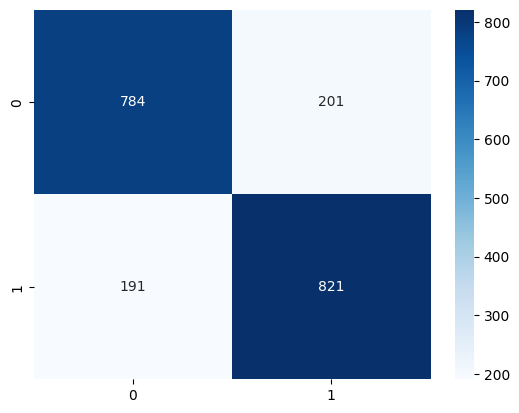

In [29]:
y_pred = dnn_model.predict(x_test_w2v)
dnn_w2v_a = accuracy_score(y_test_w2v, (y_pred > 0.5).astype("int32"))
confusion_matrix_report(y_test_w2v, (y_pred > 0.5).astype("int32"))

All Model Accuracy Comparison

<Axes: title={'center': 'Model Accuracies'}, xlabel='Accuracy', ylabel='Models'>

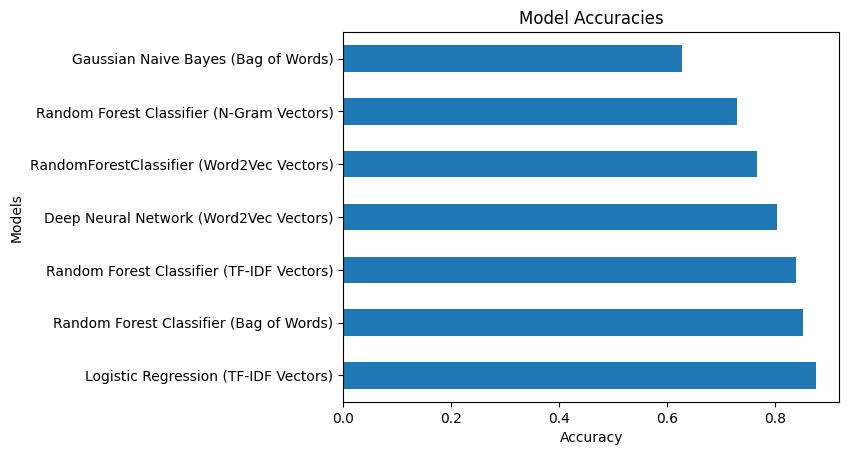

In [30]:
model_accuracies_dict = {
    "Gaussian Naive Bayes (Bag of Words)": gnb_bow_a,
    "Random Forest Classifier (Bag of Words)": rc_bow_a,
    "Random Forest Classifier (N-Gram Vectors)": rc_ng_a,
    "Random Forest Classifier (TF-IDF Vectors)": rc_tfidf_a,
    "Logistic Regression (TF-IDF Vectors)": lr_tfidf_a,
    "RandomForestClassifier (Word2Vec Vectors)": rc_w2v_a,
    "Deep Neural Network (Word2Vec Vectors)": dnn_w2v_a,
}

# Histogram of model accuracies
model_accuracies = pd.Series(model_accuracies_dict)
model_accuracies.sort_values(ascending=False).plot.barh(title="Model Accuracies", xlabel="Accuracy", ylabel="Models")

Kaggle Link for IMDB Dataset - 
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews